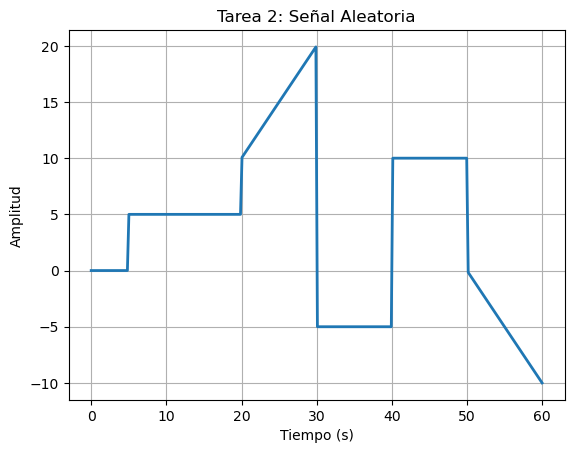

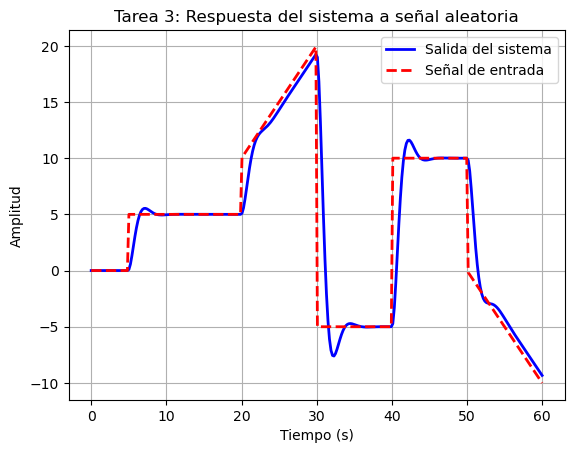

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# %% TAREA 1 – Definir la función de transferencia y graficar respuesta impulso y escalón

# Numerador y denominador de la función de transferencia
num = [3]             # Coeficiente del numerador (constante)
den = [1, 2, 3]       # Coeficientes del denominador (2do orden sobreamortiguado)

# Crear la función de transferencia en tiempo continuo
Gs = ctrl.tf(num, den)



# %% TAREA 2 – Generar señal aleatoria con tramos definidos

# Crear un vector de tiempo de 0 a 60 segundos con 300 muestras
t3 = np.linspace(0, 60, 300)

# Generar una señal aleatoria con:
# - Escalón de subida (5 unidades)
# - Rampa ascendente
# - Escalón de bajada (-5 unidades)
# - Escalón de subida (10 unidades)
# - Rampa descendente
u3 = ((t3 >= 5) & (t3 < 20)) * 5 + ((t3 >= 20) & (t3 < 30)) * (t3 - 10) + ((t3 >= 30) & (t3 < 40)) * (-5) +  ((t3 >= 40) & (t3 < 50)) * 10 + ((t3 >= 50) & (t3 <= 60)) * (-t3 + 50)

# Graficar la señal aleatoria
plt.figure()
plt.plot(t3, u3, linewidth=2)
plt.title('Tarea 2: Señal Aleatoria')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# %% RETO – Respuesta del sistema a la señal aleatoria

# Obtener la respuesta del sistema a la señal de entrada arbitraria
t_out, y_out = ctrl.forced_response(Gs, T=t3, U=u3)

# Graficar
# Graficar la señal de entrada y la respuesta del sistema en la misma figura
plt.figure()
plt.plot(t3, y_out, 'b', linewidth=2, label='Salida del sistema')
plt.plot(t3, u3, 'r--', linewidth=2, label='Señal de entrada')
plt.title('Tarea 3: Respuesta del sistema a señal aleatoria')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.show()

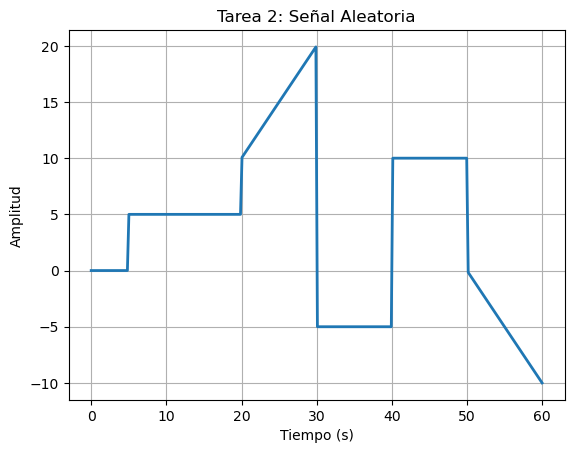

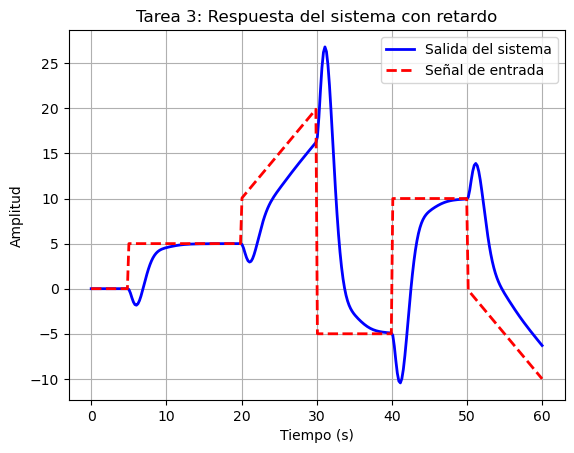

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# %% TAREA 1 – Definir la función de transferencia con retardo

# Numerador y denominador del sistema base
num = [3]
den = [1, 2, 3]

# Definir retardo (en segundos)
delay = 3# equivalente al e^{-2s}

# Aproximar el retardo con Padé de orden 1
num_pade, den_pade = ctrl.pade(delay, 1)  # puedes usar orden 2 si deseas más precisión

# Crear la función de transferencia con retardo: G(s) * e^{-2s} ≈ G(s) * Padé
G = ctrl.tf(num, den)
delay_tf = ctrl.tf(num_pade, den_pade)
Gs_delay = ctrl.series(G, delay_tf)

# %% TAREA 2 – Generar señal arbitraria compuesta

t3 = np.linspace(0, 60, 300)  # tiempo de 0 a 60 segundos
u3 = ((t3 >= 5) & (t3 < 20)) * 5 + \
     ((t3 >= 20) & (t3 < 30)) * (t3 - 10) + \
     ((t3 >= 30) & (t3 < 40)) * (-5) + \
     ((t3 >= 40) & (t3 < 50)) * 10 + \
     ((t3 >= 50) & (t3 <= 60)) * (-t3 + 50)

# Graficar la señal de entrada
plt.figure()
plt.plot(t3, u3, linewidth=2)
plt.title('Tarea 2: Señal Aleatoria')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# %% TAREA 3 – Obtener la respuesta del sistema con retardo

t_out, y_out = ctrl.forced_response(Gs_delay, T=t3, U=u3)

# Graficar la salida del sistema junto con la entrada
plt.figure()
plt.plot(t3, y_out, 'b', linewidth=2, label='Salida del sistema')
plt.plot(t3, u3, 'r--', linewidth=2, label='Señal de entrada')
plt.title('Tarea 3: Respuesta del sistema con retardo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.show()
